# **Bioinformatics Project - Computational Drug Discovery [Part 5] Comparing Regressors**

In Part 5, we will be comparing several ML algorithms for build regression models of acetylcholinesterase inhibitors.



## **1. Import libraries**

`lazypredict` is a Python library designed to simplify the process of training and evaluating multiple machine learning models quickly. It provides a straightforward interface to train and compare various models with minimal code, making it useful for rapid prototyping and model selection.

In [ ]:
! pip install lazypredict

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

## **2. Load the data set**


In [17]:
# set the %cd /path/to/directory/with/csv/file
df = pd.read_csv('bioactivity_data_preprocessed_pIC50_3class_pubchem_fp_BCR-ABL1.csv')

In [18]:
X = df.drop('pIC50', axis=1) #Splitting the data into X and Y variables
Y = df.pIC50

## **3. Data pre-processing**

In [34]:
# Examine X dimension
X.shape

(328, 95)

NameError: name 'head' is not defined

In [54]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(328, 95)

In [47]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## **4. Compare ML algorithms**

Here we look at various machine learning algorithms to see which one performs best on our data.

In [57]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:06<00:00,  6.95it/s]


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000124 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 285
[LightGBM] [Info] Number of data points in the train set: 262, number of used features: 95
[LightGBM] [Info] Start training from score 7.123840
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

100%|██████████| 42/42 [00:06<00:00,  6.64it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 285
[LightGBM] [Info] Number of data points in the train set: 262, number of used features: 95
[LightGBM] [Info] Start training from score 7.123840
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

In [55]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GaussianProcessRegressor,0.58,0.73,0.69,0.03
ExtraTreeRegressor,0.58,0.73,0.69,0.01
ExtraTreesRegressor,0.58,0.73,0.69,0.23
DecisionTreeRegressor,0.58,0.73,0.69,0.02
RandomForestRegressor,0.53,0.70,0.73,0.30
BaggingRegressor,0.48,0.67,0.76,0.04
GradientBoostingRegressor,0.47,0.67,0.77,0.17
MLPRegressor,0.41,0.63,0.81,0.37
HistGradientBoostingRegressor,0.40,0.62,0.82,0.11


In [58]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,12157740250082386507858690995435333891769659997...,-5611264730807255761012207330478744320412099295...,91311559522403438598016091553792.00,0.08
KernelRidge,77.19,-34.17,7.23,0.15
GaussianProcessRegressor,34.56,-14.49,4.80,0.02
PassiveAggressiveRegressor,3.83,-0.31,1.39,0.01
RANSACRegressor,3.73,-0.26,1.37,0.31
QuantileRegressor,3.37,-0.10,1.28,0.45
LassoLars,3.23,-0.03,1.24,0.01
Lasso,3.23,-0.03,1.24,0.01
DummyRegressor,3.23,-0.03,1.24,0.01


## **5. Data visualization of model performance**

[(0.0, 1.0)]

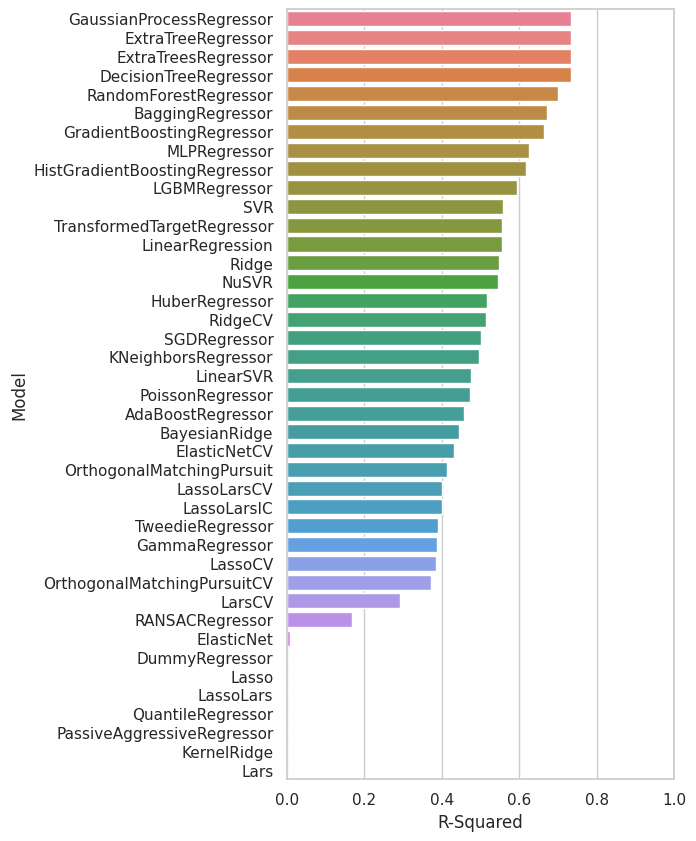

In [67]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train, hue="Model")
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

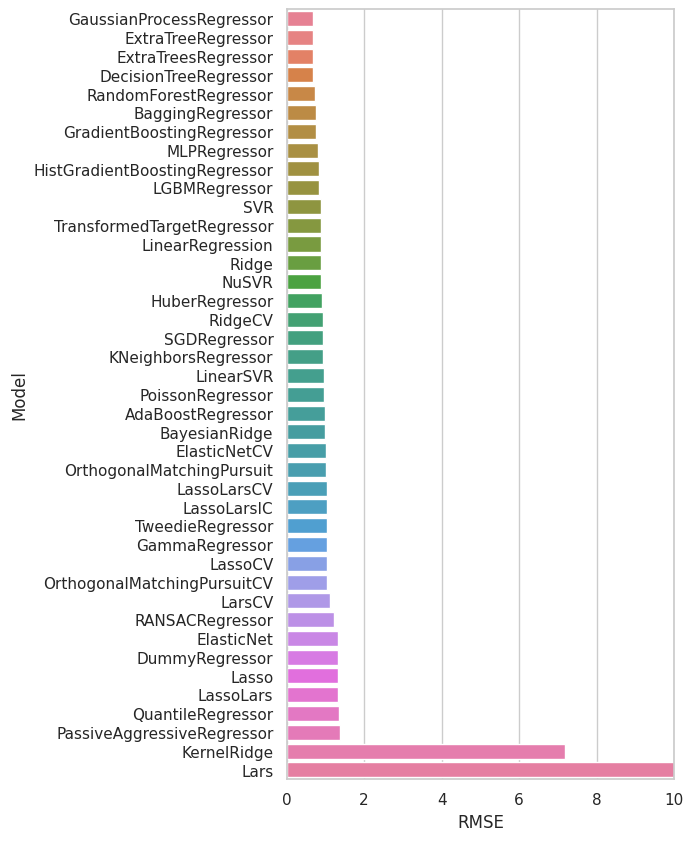

In [66]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train, hue="Model")
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

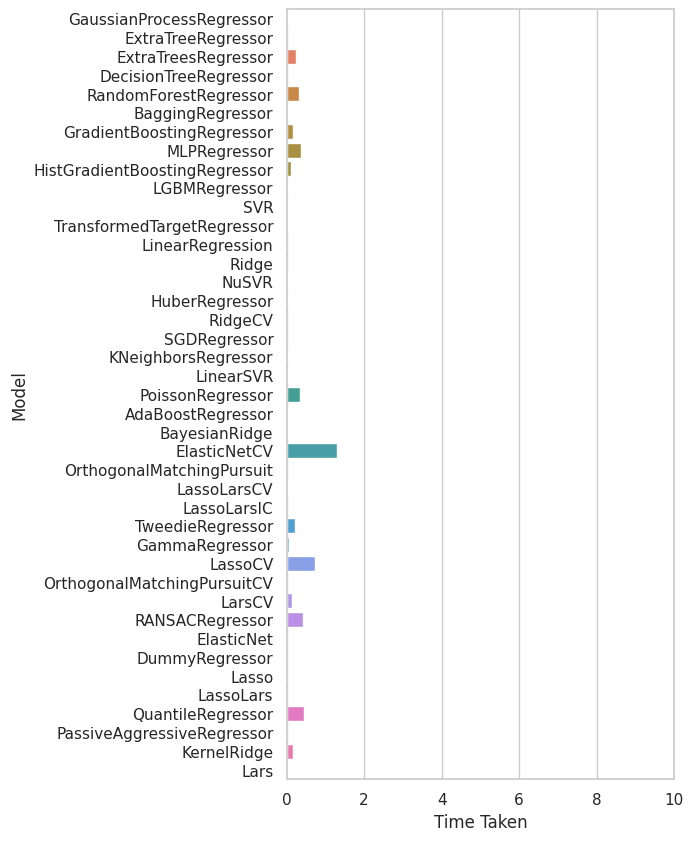

In [69]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train, hue="Model")
ax.set(xlim=(0, 10))